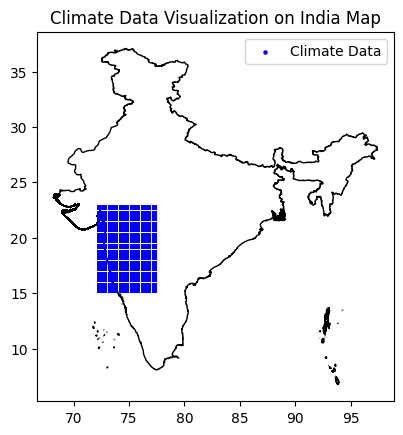

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the India boundary shapefile
india_gdf = gpd.read_file('C:/Users/jessd/Downloads/Bit N Built/archive/India Boundary/India_boundary.shp')

# Plot the boundary of India
base = india_gdf.plot(color='white', edgecolor='black')

# Plot current climate data points (e.g., temperature) on the map
climate_gdf.plot(ax=base, marker='o', color='blue', markersize=5, label='Climate Data')

plt.title('Climate Data Visualization on India Map')
plt.legend()
plt.show()


     LAT    LON  YEAR  MO  DY  Temperature  Precipitation(mm/day)  \
0  15.25  72.25  2023   1   1        26.99                    0.0   
1  15.25  72.75  2023   1   1        27.07                    0.0   
2  15.25  73.25  2023   1   1        27.00                    0.0   
3  15.25  73.75  2023   1   1        26.65                    0.0   
4  15.25  74.25  2023   1   1        24.02                    0.0   

   Humidity (%)  Wind(m/s)             geometry  
0         73.53       5.75  POINT (72.25 15.25)  
1         72.35       5.79  POINT (72.75 15.25)  
2         69.36       5.19  POINT (73.25 15.25)  
3         63.53       3.19  POINT (73.75 15.25)  
4         67.11       1.68  POINT (74.25 15.25)  


C:\Users\jessd\AppData\Local\Temp\ipykernel_16848\4187386944.py:28: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  disaster_gdf.plot(ax=base, marker='x', color='red', markersize=10, label='Disaster Risk Areas')
C:\Users\jessd\AppData\Local\Temp\ipykernel_16848\4187386944.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


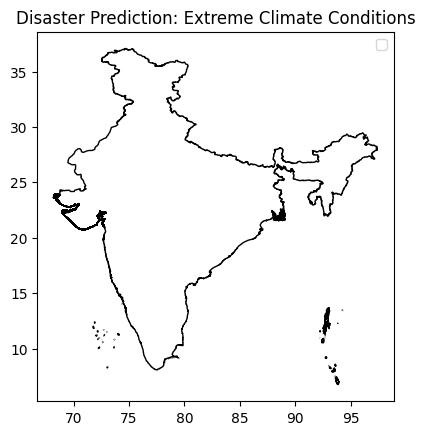

Potential disasters at the following locations:
Empty DataFrame
Columns: [LAT, LON, Temperature, Precipitation(mm/day), Wind(m/s)]
Index: []


In [23]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Load the climate data CSV file
climate_data = pd.read_csv('C:/Users/jessd/Downloads/Bit N Built/weather_data.csv')

# Convert latitude and longitude to a geometry column (Point)
geometry = [Point(xy) for xy in zip(climate_data['LON'], climate_data['LAT'])]
climate_gdf = GeoDataFrame(climate_data, geometry=geometry)

# Display the first few rows of the GeoDataFrame
print(climate_gdf.head())
# Define disaster thresholds
temp_threshold = 45  # Heatwave threshold in Celsius
precip_threshold = 200  # Flood risk threshold in mm of rain
wind_threshold = 100  # Storm risk threshold in km/h

# Identify locations with potential disasters
disaster_conditions = (climate_gdf['Temperature'] > temp_threshold) | \
                      (climate_gdf['Precipitation(mm/day)'] > precip_threshold) | \
                      (climate_gdf['Wind(m/s)'] > wind_threshold)

disaster_gdf = climate_gdf[disaster_conditions]


base = india_gdf.plot(color='white', edgecolor='black')
disaster_gdf.plot(ax=base, marker='x', color='red', markersize=10, label='Disaster Risk Areas')

plt.title('Disaster Prediction: Extreme Climate Conditions')
plt.legend()
plt.show()

# Print the locations and details of potential disasters
print("Potential disasters at the following locations:")
print(disaster_gdf[['LAT', 'LON', 'Temperature', 'Precipitation(mm/day)', 'Wind(m/s)']])


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('C:/Users/jessd/Downloads/Bit N Built/weather_data.csv')

# Check for missing values and data types
print("Missing values:\n", data.isnull().sum())
print("Data types before conversion:\n", data.dtypes)

# Ensure that 'YEAR', 'MO', and 'DY' are integers and convert them if necessary
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce').fillna(0).astype(int)
data['MO'] = pd.to_numeric(data['MO'], errors='coerce').fillna(0).astype(int)
data['DY'] = pd.to_numeric(data['DY'], errors='coerce').fillna(0).astype(int)

# Function to create a date
def create_date(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MO'])
        day = int(row['DY'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT  # Return Not-a-Time if the date is invalid

# Apply the function to create a new date column
data['Date'] = data.apply(create_date, axis=1)

# Check for rows where conversion failed
if data['Date'].isnull().any():
    print("Rows with invalid dates:\n", data[data['Date'].isnull()])

# Extract features and target variable
# Example: predicting temperature
X = data[['LAT', 'LON', 'Date']].copy()

# Extracting year, month, day as separate features
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Target variable
y = data['Temperature']

# Drop any rows with NaN values in features or target
X = X.dropna()
y = y[X.index]  # Ensure y matches the cleaned X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Function to predict temperature for a given lat, lon, date
def predict_temperature(lat, lon, date):
    date_obj = pd.to_datetime(date)  # e.g., '2024-01-01'
    features = np.array([[lat, lon, date_obj.year, date_obj.month, date_obj.day]])
    return model.predict(features)

# Example of predicting temperature for specific lat, lon on a specific date
lat = 15.25
lon = 72.25
date = '2024-01-01'
predicted_temp = predict_temperature(lat, lon, date)
print(f'Predicted Temperature: {predicted_temp[0]}°C')


Missing values:
 LAT                      0
LON                      0
YEAR                     0
MO                       0
DY                       0
Temperature              0
Precipitation(mm/day)    0
Humidity(g/kg)           0
Wind(m/s)                0
dtype: int64
Data types before conversion:
 LAT                      float64
LON                      float64
YEAR                       int64
MO                         int64
DY                         int64
Temperature              float64
Precipitation(mm/day)    float64
Humidity(g/kg)           float64
Wind(m/s)                float64
dtype: object
Mean Squared Error: 11.710491827400185
Predicted Temperature: 28.439565672312018°C


C:\Users\jessd\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\jessd\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\jessd\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

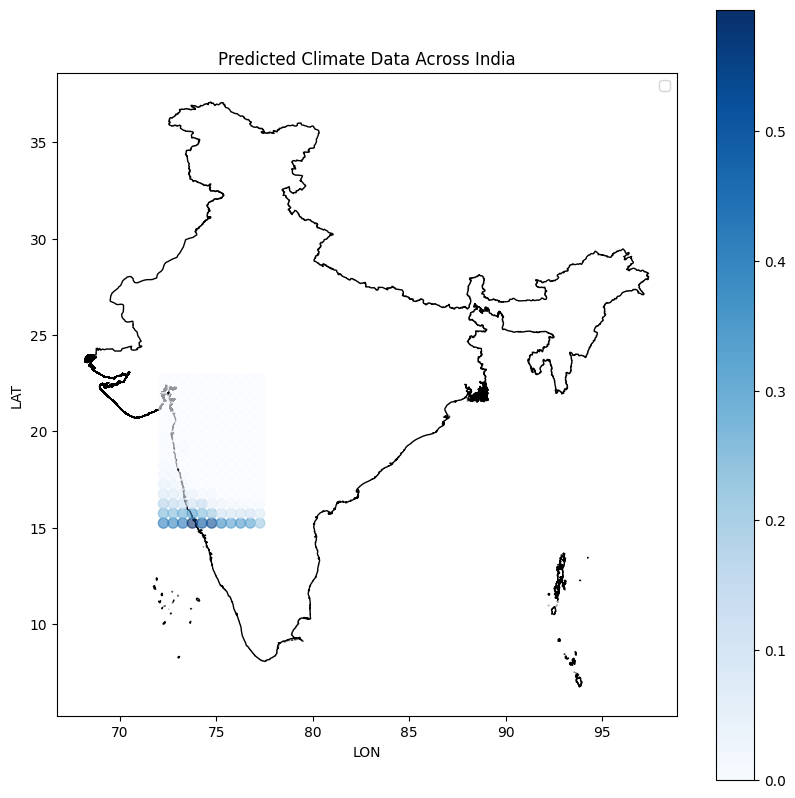

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the India boundary shapefile
india_gdf = gpd.read_file('C:/Users/jessd/Downloads/Bit N Built/archive/India Boundary/India_boundary.shp')  # Update with the correct path

# Load your climate data CSV file
climate_data = pd.read_csv('C:/Users/jessd/Downloads/Bit N Built/weather_data.csv')

# Extract unique latitude and longitude points from your climate data for predictions
latitudes = climate_data['LAT'].unique()  # Adjust column name as necessary
longitudes = climate_data['LON'].unique()  # Adjust column name as necessary

# Create lists to store predictions
predicted_temps = []
predicted_rains = []
predicted_hums = []
predicted_winds = []

# Loop through unique latitude and longitude points to make predictions
for lat in latitudes:
    for lon in longitudes:
        # Use a fixed date for prediction, you can customize this as needed
        date = '2024-10-12'  # Example date
        predicted_temp, predicted_rain, predicted_hum, predicted_wind = predict_all(lat, lon, date)
        
        # Append the results
        predicted_temps.append([lat, lon, predicted_temp, predicted_rain, predicted_hum, predicted_wind])

# Convert predictions into a DataFrame for easier plotting
predictions_df = pd.DataFrame(predicted_temps, columns=['LAT', 'LON', 'Temperature', 'Precipitation(mm/day)', 'Humidity(g/kg)', 'Wind(m/s)'])

# Create a GeoDataFrame from the predictions DataFrame
geometry = gpd.points_from_xy(predictions_df['LON'], predictions_df['LAT'])
predictions_gdf = gpd.GeoDataFrame(predictions_df, geometry=geometry)

# Plot the boundary of India
base = india_gdf.plot(color='white', edgecolor='black', figsize=(10, 10))


predictions_gdf.plot(ax=base, marker='o', 
                     column='Precipitation(mm/day)',  # Change to 'Temperature', 'Humidity', or 'Wind' as needed
                     cmap='Blues',  # Color map for rainfall
                     markersize=predictions_gdf['Temperature']*2,  # Scale markers by temperature
                     legend=True, 
                     alpha=0.6)  # Set transparency

# Customize the plot
plt.title('Predicted Climate Data Across India')
plt.xlabel('LON')
plt.ylabel('LAT')
plt.legend()

# Display the plot
plt.show()
